# <center> **Major Project - Wine Quality Analysis** </center>

## Introduction
Predict quality of wine using Machine Learning techniques.

## Attribute Information:

### Input variables (based on physicochemical tests):

1. fixed acidity — primary fixed acids found in wine are tartaric, succinic, citric, and malic.
2. volatile acidity — the gaseous acids present in wine.
3. citric acid — the weak organic acid found in citrus fruits naturally.
4. residual sugar — amount of sugar left after fermentation.
5. chlorides — amount of salt present in wine.
6. free sulfur dioxide — used for prevention of wine by oxidation and microbial spoilage.
7. total sulfur dioxide — the portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the   wine.
8. density — the mass per unit volume of wine.
9. pH — used for checking acidity.
10. alcohol — percent of alcohol present in wine.
11. sulphates :    Added sulfites preserve freshness and protect wine from oxidation, and bacteria.

### Output variable (based on sensory data):

12. quality

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset

df = pd.read_excel('1788410-1767134-1729261-1613779-Red_wine__(1).xlsx')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


## Exploratory Data Analysis

In [3]:
# Description of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1598.0,46.433041,32.876249,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1598.0,3.498586,0.080346,2.74000,3.5200,3.52000,3.520000,3.90000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [4]:
# Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [5]:
# Shape of the dataset
df.shape

(1599, 12)

In [6]:
# Checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [7]:
# Impute the missing values by means as the data present in the different columns are continuous values

for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())

# Checking for null values
df.isnull().sum().sum()

0

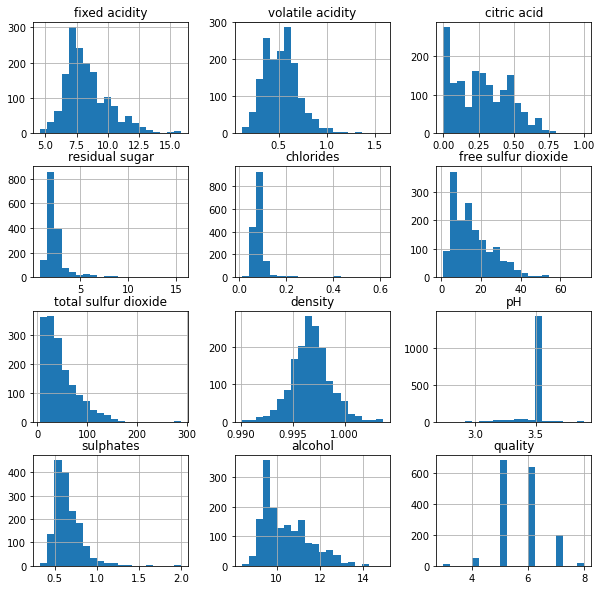

In [8]:
# Visualise the distribution of the data with continuous values in the columns of the dataset
df.hist(bins=20, figsize=(10, 10))
plt.show()

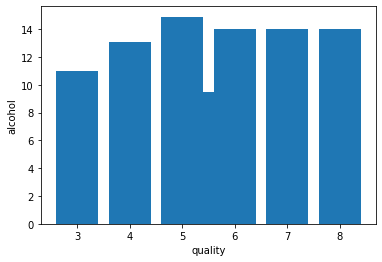

In [9]:
# Draw the count plot to visualise the number data for each quality of wine
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

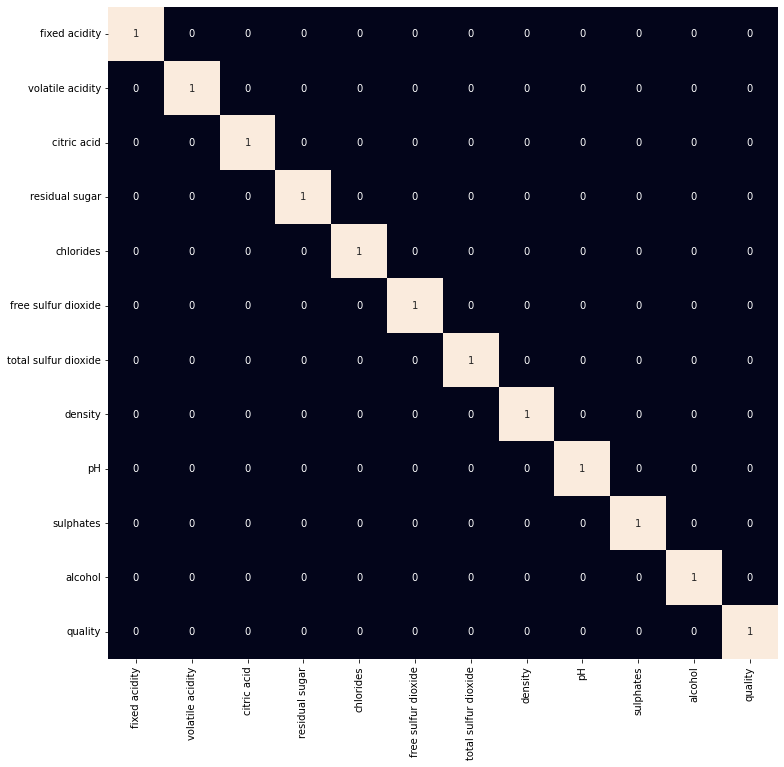

In [10]:
# Checking redundant features

plt.figure(figsize=(12, 12))
sns.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()

#### From the above heat map we can conclude that the 'total sulphur dioxide' and 'free sulphur dioxide' are highly correlated features so, we will remove them.

In [11]:
new_df=df.drop('total sulfur dioxide',axis=1)

## Model Development

In [12]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

#### After segregating features and the target variable from the dataset we will split it into 80:20 ratio for model selection.

In [13]:
features = df.drop(['quality', 'best quality'], axis=1)
target = df['best quality']

xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.2, random_state=40)

xtrain.shape, xtest.shape

((1279, 11), (320, 11))

# Normalisation

In [14]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

In [15]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for i in range(3):
    models[i].fit(xtrain, ytrain)

print(f'{models[i]} : ')
print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
print('Validation Accuracy : ', metrics.roc_auc_score(
ytest, models[i].predict(xtest)))
print()

SVC() : 
Training Accuracy :  0.7692031798127094
Validation Accuracy :  0.7716369784908181



### From the above accuracies, we can conclude that the SVC() classifier performing better on the validation data

# Model Evaluation

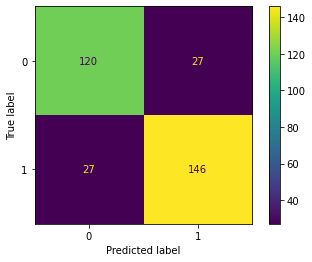

In [16]:
# Plot confusion matrix
metrics.plot_confusion_matrix(models[1], xtest, ytest)
plt.show()

In [17]:
# Classification report

print(metrics.classification_report(ytest,models[1].predict(xtest)))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       147
           1       0.84      0.84      0.84       173

    accuracy                           0.83       320
   macro avg       0.83      0.83      0.83       320
weighted avg       0.83      0.83      0.83       320



# Conclusion

### The quality of the wine based on the analysis of physicochemical data. The accuracy of the support vector machine (SVM) algorithm is 83%.